# Phishing Detection Training

- This notebook will implement and test multiple models for URL detection

First we import libraries and get data, we also display columns for choosing later on

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
data = pd.read_csv('data/data_featured.csv', index_col=0)
data.columns

Index(['Label', 'periods', 'slashes', 'doubleSlashes', 'atSymbol', 'length',
       'numberCount', 'firstdigit', 'wLetter', 'vLetter', 'xLetter', 'zLetter',
       'jLetter', 'qLetter', 'Vocab'],
      dtype='object')

# Train
Now we train a simple KNN classifier and get train, cross validation and test set accuracy

In [4]:
data_y = data['Label']
data_x = data.drop('Label', axis=1)

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=1)

# Split into training and cross validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.1, random_state=1)
    
knn = KNeighborsClassifier(n_neighbors=2)

print('Training Model - KNN ...')

knn.fit(x_train, y_train)
print("Model Trained - KNN ... ")

# fig, axes = plt.subplots(1, 1, figsize=(15, 10))
# confusion_matrix_plot(knn, axes, title='KNN Confusion Matrix')

Training Model - KNN ...
Model Trained - KNN ... 


# Evaluating KNN
- A quick look at accuracy score and f1 score
- Corresponding confusion matrix

Caclulating Accuracies ...

Training f1 Score: 0.7860901419236003
Training Accuracy: 0.8954738981816711

Cross Validation f1 Score: 0.6847224871256913
Cross Validation Accuracy: 0.8495494675525621

Testing f1 Score: 0.6854995612863847
Testing Accuracy: 0.8499317375079639


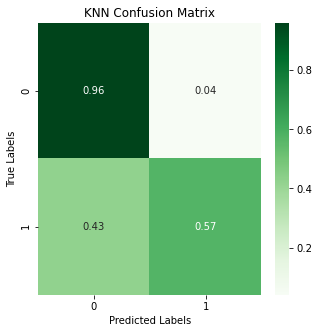

In [5]:
def print_accuracies(model):
    print("Caclulating Accuracies ...")
    train_predicts = model.predict(x_train)
    print('\nTraining f1 Score:', metrics.f1_score(y_train, train_predicts))
    print('Training Accuracy:', metrics.accuracy_score(y_train, train_predicts))

    cross_predicts = model.predict(x_val)
    print('\nCross Validation f1 Score:', metrics.f1_score(y_val, cross_predicts))
    print('Cross Validation Accuracy:', metrics.accuracy_score(y_val, cross_predicts))

    test_predicts = model.predict(x_test)
    print('\nTesting f1 Score:', metrics.f1_score(y_test, test_predicts))
    print('Testing Accuracy:', metrics.accuracy_score(y_test, test_predicts))
    return train_predicts, cross_predicts, test_predicts

def confusion_matrix_plot(y_true, y_predict, title='Confusion Matrix'):
    confusion_data = metrics.confusion_matrix(y_true, y_predict, normalize='true')

    fig, ax = plt.subplots(figsize=(5, 5))
    
    sns.heatmap(confusion_data, cmap='Greens', annot=True); #annot=True to annotate cells

    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    #ax.set_xticklabels(['Non-Phishing', 'Phishing'])
    #ax.set_yticklabels(['Non-Phishing', 'Phishing'])
    plt.show()

train_predicts, cross_predicts, test_predicts = print_accuracies(knn)
confusion_matrix_plot(y_test, test_predicts, title="KNN Confusion Matrix")

Caclulating Accuracies ...

Training f1 Score: 0.8124735595742302
Training Accuracy: 0.9024974211686657

Cross Validation f1 Score: 0.7662519712633608
Cross Validation Accuracy: 0.8785837808318923

Testing f1 Score: 0.7669618588338447
Testing Accuracy: 0.8790479657777374


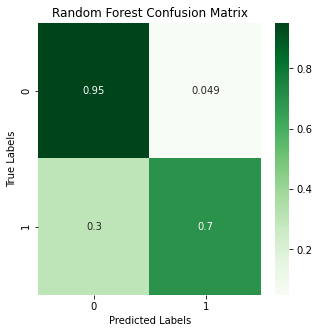

In [6]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(min_samples_leaf=3)
forest.fit(x_train, y_train)

train_predicts, cross_predicts, test_predicts = print_accuracies(forest)
confusion_matrix_plot(y_test, test_predicts, title='Random Forest Confusion Matrix')

In [15]:
import numpy as np
true_positives = y_val == 1
predicted_negatives = cross_predicts == 0

og_data = pd.read_csv('data/phishing_site_urls.csv', index_col=0)

false_negative_indexes = np.array((true_positives != predicted_negatives)).nonzero()
with open("test.csv", 'w') as file:
    for i in range(len(false_negative_indexes)):
        file.write(str(og_data.iloc[false_negative_indexes[i]].index))